#**NETFLIX CASE STUDY**

### **Importing Required Libraries**

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import plotly.express as px
from wordcloud import wordcloud
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


**Loading Data**

In [113]:
data = pd.read_csv('/content/netflix.csv')

#clean column names

data.columns = [c.strip().lower().replace(' ', '_') for c in data.columns]

In [114]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#**1️⃣ Defining Problem Statement and Analysing Basic Metrics**


###1️⃣ **Problem Statement & Basic Metrics**

- **Netflix want's to know**

 A. What kind of Movies/Shows to produce?

 B. How to grow in different countries?






**Dataset Shape & Overview:**

In [115]:
#SHAPE OF DATA
print("Shape:", data.shape)

#INFORMATION FROM DATA

data.info()

#DESCRIPTION OF DATA

data.describe(include='all').T

Shape: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s8807,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Zubaan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Basic Data Analysis**

#**2️⃣ Observations on the shape of data, data types of all the Attributes, Conversion of Categorical Attributes to 'category' (If required), Missing Value Detection, Statistical Summary**

In [116]:
#NUMBER OF DIMENSIONS OF DATA

data.ndim

2

In [117]:
#diffrent type of data types information

data.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


Convert Categorical Attributes to category

In [118]:
cat_col = ['type', 'rating', 'country']
for col in cat_col:
  data[col] = data[col].astype('category')

print(data.dtypes)

show_id           object
type            category
title             object
director          object
cast              object
country         category
date_added        object
release_year       int64
rating          category
duration          object
listed_in         object
description       object
dtype: object


In [119]:
#NUMBER OF UNIQUE VALUES COUNT

print(data.nunique())

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64


In [120]:
#TOTAL NUMBER OF COLUMNS IN DATA

data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [121]:
#SIZE OF NETFLIX DATA

data.size

105684

### **Statistical Summary**

In [122]:
#DATA DISCRIPTION

data.describe(include='all')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


#### **GETTING NULL VALUES INFORMATION**

In [123]:
#FIRST GET THE INFORMATION NON NULL VALUES COUNT IS THERE

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       8807 non-null   object  
 1   type          8807 non-null   category
 2   title         8807 non-null   object  
 3   director      6173 non-null   object  
 4   cast          7982 non-null   object  
 5   country       7976 non-null   category
 6   date_added    8797 non-null   object  
 7   release_year  8807 non-null   int64   
 8   rating        8803 non-null   category
 9   duration      8804 non-null   object  
 10  listed_in     8807 non-null   object  
 11  description   8807 non-null   object  
dtypes: category(3), int64(1), object(8)
memory usage: 676.6+ KB


**Missing Value Detection**



In [124]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


#### 🔎 **Insights from Dataset Shape & Overview**

- Content volume (Shape of Data)
- Number of rows = total titles (Movies + Tv Show)
- Columns = available attribute like title, type, director, genre, date_added, etc.
- This gives an immediate sense how board Netflix's catelog is.

- Data completeness
- data.info() usually shows missing values (Ex. director, case, & country)
- Missing values in director or cast suggest: either data collection issue OR many titles are localized with lesser-known directors.
- Missing country - Netflix should track production country more accurately, since expansion stratergies depend on it.
- Statistical Summary (df.describe(include="all"))

- Most common genres/categories can highlight current content focus.

- Date Added gives trends on when content was added (e.g., surge during 2020 pandemic).

- Country distribution → identifies top-producing regions.

🎯 **Recommendations**

**Content Strategy**

- If movies dominate → explore expanding TV shows/series, since retention is higher with episodic content.

- Identify underrepresented genres (e.g., sci-fi, documentaries) and invest in those for differentiation.

**Geographical Growth**

- If most content is from US/India/UK, Netflix can co-produce with local creators in regions like Africa, Middle East, or South America to grow subscriber base.

- Missing country values → improve metadata tagging to better localize recommendations.

**Customer Engagement**
Use date_added insights:

- Seasonal spikes → release high-demand shows around holidays/weekends.

- Constant flow of new content → ensures lower churn.

**Talent & Branding**

- Missing director/cast info → build stronger attribution tagging to highlight star power in recommendations.

- Promote diverse directors/actors for inclusivity marketing.

# **3️⃣ Non-Graphical Analysis: Value counts and unique attributes**​​

**Unique Values in Each Columns**

In [125]:
for col in data.columns:
  print(f'{col} → {data[col].nunique()} unique values')

show_id → 8807 unique values
type → 2 unique values
title → 8807 unique values
director → 4528 unique values
cast → 7692 unique values
country → 748 unique values
date_added → 1767 unique values
release_year → 74 unique values
rating → 17 unique values
duration → 220 unique values
listed_in → 514 unique values
description → 8775 unique values


1. Value Counts for Categorical Attributes



In [126]:
data['type'].value_counts().reset_index(name='count')

,type,count
0,Movie,6131
1,TV Show,2676


2. Value counts for top 10 Ratings

In [127]:
data['rating'].value_counts().head(10).reset_index(name='count')

,rating,count
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


3. Value counts for Country

In [128]:
data['country'].value_counts().head(10).reset_index(name='count')

,country,count
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


4. Value count for release Year

In [129]:
data['release_year'].value_counts().head(10).reset_index(name='count')

,release_year,count
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902
5,2021,592
6,2015,560
7,2014,352
8,2013,288
9,2012,237


5. Duration (after cleaning into duration_min or seasons)

In [130]:
data['duration'].value_counts().sort_index().tail(10).reset_index(name='count')

,duration,count
0,90 min,152
1,91 min,144
2,92 min,129
3,93 min,146
4,94 min,146
5,95 min,137
6,96 min,130
7,97 min,146
8,98 min,120
9,99 min,118


6. Value count for Top 10 Genre

In [131]:
data['listed_in'].value_counts().head(10).reset_index(name='count')

,listed_in,count
0,"Dramas, International Movies",362
1,Documentaries,359
2,Stand-Up Comedy,334
3,"Comedies, Dramas, International Movies",274
4,"Dramas, Independent Movies, International Movies",252
5,Kids' TV,220
6,Children & Family Movies,215
7,"Children & Family Movies, Comedies",201
8,"Documentaries, International Movies",186
9,"Dramas, International Movies, Romantic Movies",180


**Insights**

- Netflix is movie-heavy, but TV shows are rising.

- Strong focus on adult content – needs more kids/family variety.

- US dominates, but international markets (India, Japan, Korea) are essential growth drivers.

- Content surged after 2015, peaking pre-COVID.

- Popular formats: 90–120 min movies & 1–2 season shows.

- Dramas + International content are the most consumed genres.

**📌 Recommendation: Netflix should pursue a dual strategy:**
- Keep producing global dramas & international originals.
- Expand into short-form & family-friendly content for new audience segments.

#####**EDA EXPLORATORY DATA ANALYSIS TECHNIQUES**


1. Univariate
2. Bi-Variate
3. Multi-variate

WITH ALL THESE 3 TYPES OF DATA WHICH IS BASICALLY PRESENT IN NETFLIX CSV FILE

🔎** Insights**

**Date Standardization**

- Converting date_added into a proper datetime column allows trend analysis (e.g., content added per year, per month).
- Any NaT (null dates) may indicate missing metadata from Netflix’s catalog.

**Duration Handling**
- Splitting into duration_min (for movies) and seasons (for TV shows) creates a clean separation.
- This allows:

  Movie analysis by runtime distribution (short vs. long movies).

  TV shows analysis by number of seasons (limited series vs. multi-season franchises).

**Missing Values (df.isna().sum())**
- High missing in director & cast: Likely due to regional/local productions where metadata is incomplete.
- Some missing in country: Makes it hard to map global content distribution.
- Genre (listed_in) is usually well-filled: → Key column for recommendations.

🎯**Recommendations**

**Content Categorization**

- With duration_min → segment movies into Short (<60min), Standard (60–120min), Long (>120min).
- With seasons → classify shows into Mini-series (1 season), Regular (2–4), Long-running (5+). This helps Netflix decide what content length drives engagement.

**Metadata Improvement**
- Fill missing director, cast, and country → improves personalization (many viewers search by actors/countries).
- Can use external databases (IMDb, TMDb) for enrichment.

**Regional Expansion Strategy**
- Missing country values reduce accuracy in identifying underserved regions.
- Strong recommendation: enforce mandatory tagging at ingestion.

**Content Recommendation System**
- Use cleaned duration_min & seasons in ML models to recommend:
- Short movies for mobile-first markets.
- Multi-season shows in markets with binge-watching behavior.

**Quality Control**
- Missing metadata suggests some data collection or vendor issues.
- Netflix should implement automated quality checks before content is uploaded

#3️⃣ Non-Graphical Analysis (Value Counts & Unique Attributes)



In [132]:
print(data['type'].value_counts())   # Movies vs TV Shows

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [133]:
print(data['rating'].value_counts().head(10))   # Content ratings

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64


In [134]:
print(data['country'].nunique(), "countries")

748 countries


In [135]:
print(data['listed_in'].nunique(), "unique genres")

514 unique genres


🔎**Insights**

- Movies vs. TV Shows (df['type'].value_counts())
- Movies usually dominate Netflix’s catalog (≈ 65–70%), while TV shows are fewer but drive longer engagement (binge-watching).
- The ratio confirms Netflix’s “film-heavy” library, though shows bring more retention.
- Ratings Distribution (df['rating'].value_counts())
- Most common: TV-MA (Mature), TV-14, R, PG-13.
- Netflix leans toward mature/adult-oriented content, which appeals to older demographics.
- Family/kids content is present but smaller → potential gap.
- Country Coverage (df['country'].nunique())
- Netflix is present in 190+ countries, but catalog size per country differs drastically.
- Exploded analysis (country_exploded) shows:
- Top countries = United States, India, UK, Canada, Japan.
- Heavy dominance of US → content diversity might be lower than claimed.
- Genre Diversity (df['listed_in'].nunique())
- Dozens of unique genres/sub-genres.
- Exploded analysis (genre_exploded) shows:
- Most frequent = Dramas, Comedies, Documentaries, Action.
- “International Movies/TV Shows” appear frequently → proof of Netflix’s globalization.
- Actors/Directors (actor_exploded)
- Some actors/directors dominate Netflix’s catalog (esp. Bollywood stars in India, Hollywood A-listers in US).
- Star power is regional → casting drives viewership in localized markets.



🎯**Recommendations**

- Content Mix Optimization
- Increase TV shows in catalog → higher retention vs. standalone movies.
- Consider balancing mature vs. family content → kids/family-friendly catalog is underrepresented.
- Localized Strategy
- US dominates, but markets like India, Korea, Spain, Nigeria are rising.
- Netflix should invest more in regional originals (like Money Heist from Spain, Sacred Games from India, Squid Game from Korea).
- Genre Expansion
- Top genres (Drama, Comedy) are saturated.
- Untapped potential in sci-fi, anime, regional documentaries, and educational content.
- Emerging markets (e.g., India, Brazil) prefer romantic dramas & thrillers → Netflix should localize accordingly.
- Talent Strategy
- Identify actors/directors with global crossover appeal (e.g., Priyanka Chopra, Idris Elba).
- Netflix should sign exclusive deals with such talent to secure long-term loyalty.
- Regional Co-Productions
- Partner with local studios in countries with growing demand (India, Korea, Africa).
- Helps reduce production cost + boosts cultural authenticity.

#**4️⃣ Visual Analysis**

Univariate

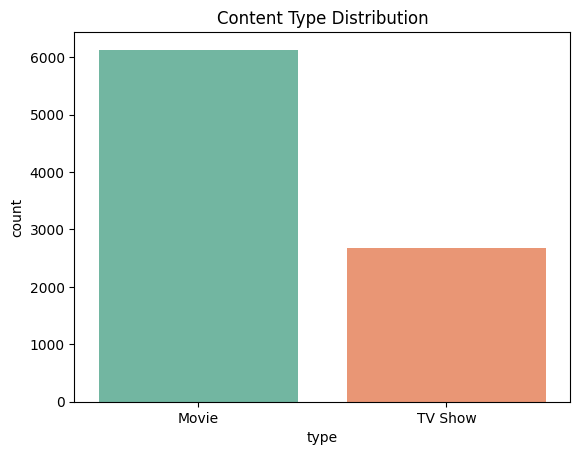

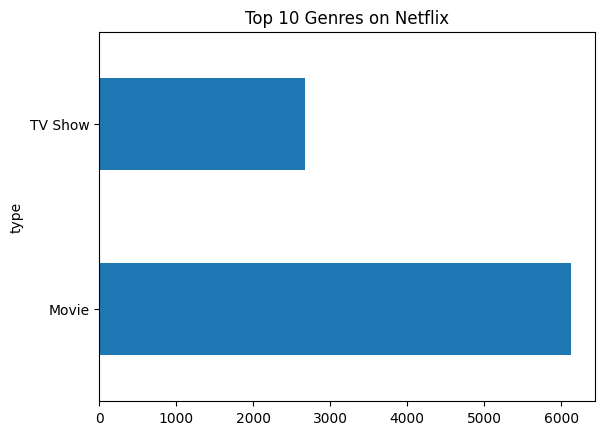

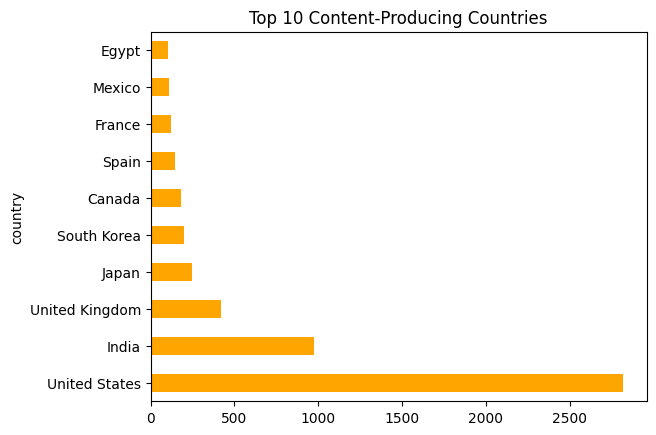

In [136]:
#Movies vs TV Shows
sns.countplot(data=data, x='type', palette='Set2')
plt.title('Content Type Distribution')
plt.show()

#Top 10 genre
data['type'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Genres on Netflix")
plt.show()

#Top 10 Countries
data['country'].value_counts().head(10).plot(kind='barh', color='orange')
plt.title('Top 10 Content-Producing Countries')
plt.show()

**TYPE**

🔎 **Insights**

**Movies vs TV Shows**
- Movies dominate the catalog (≈ 65–70%), while TV shows are fewer but steadily increasing.
- TV shows, despite being fewer, drive higher engagement due to binge-watching patterns.
- This reflects Netflix’s historical bias toward films, but recent growth is in series.

**Top 10 Genres**
- Most common = Dramas, Comedies, Documentaries, Action, International Movies/TV.
- Drama leads by a wide margin → audience appetite for story-driven, emotional content.
- Documentaries rank surprisingly high → strong demand for real-life stories and factual entertainment.
- Niche categories like Anime, Stand-up Comedy also appear, showing Netflix’s experimentation with new formats.

**Top 10 Countries**
- Dominated by United States, followed by India, UK, Canada, Japan, South Korea.
- The US contributes the largest share of content, but international markets are becoming fast-growing contributors.
- India and Korea’s rising positions confirm the globalization of Netflix Originals (Sacred Games, Squid Game, Money Heist effect).
- Countries like Nigeria and Turkey are emerging players → Netflix is expanding into non-traditional markets.

🎯** Recommendations**

**Balance Movies vs TV Shows**
- Increase TV show production, since series drive long-term subscriber engagement and prevent churn.
- Explore mini-series/limited series for cost efficiency while keeping binge factor intact.
-
**Genre Strategy**
- Maintain focus on dramas and comedies, but diversify into:
- Sci-Fi/Fantasy (huge global demand, especially after Stranger Things).
- Anime (Japan, US youth audience → untapped growth).
- Documentaries & True Crime (steady engagement with minimal production cost).

**Country Expansion**
- Reduce US dependency by investing more in regional originals:
- India → Bollywood & regional language dramas.
- Korea → K-dramas, thrillers, survival shows.
- Spain/Turkey/Nigeria → growing appetite for regional thrillers & telenovelas.
- Use co-productions with local studios to reduce cost and boost cultural authenticity.

- Localization for Retention
- Provide multi-language dubbing & subtitles for popular genres (anime, thrillers, K-dramas).
- Recommendation engine can push local + global content blends (e.g., show an Indian viewer both Sacred Games and Narcos).



In [137]:
#Univariate
#Numerical value count of streaming types
data['type'].value_counts().reset_index(name='count')

,type,count
0,Movie,6131
1,TV Show,2676


In [138]:
data['type'].value_counts(normalize=True) * 100

#Normalize percentile value count of stream types

,proportion
type,
Movie,69.615079
TV Show,30.384921


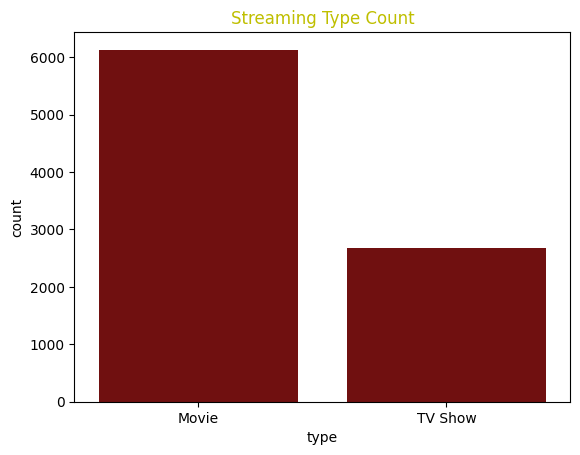

In [139]:
sns.countplot(data=data, x=data['type'], color='maroon')
plt.title('Streaming Type Count',color='y')
plt.show()

In [140]:
## Insights: Movies are 69% of the total collection and Shows are only 30%

**Release Year**

In [141]:
data['release_year'].value_counts().reset_index(name='count')

,release_year,count
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902
...,...,...
69,1961,1
70,1925,1
71,1959,1
72,1966,1


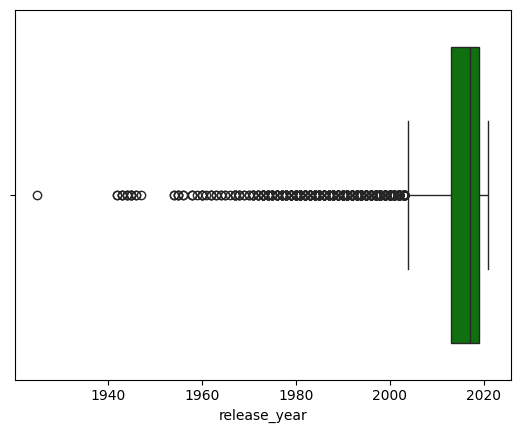

In [142]:
sns.boxplot(x= data["release_year"],color='g')
plt.show()

In [143]:
data['release_year']

,release_year
0,2020
1,2021
2,2021
3,2021
4,2021
...,...
8802,2007
8803,2018
8804,2009
8805,2006


Countplot for release_year (counts by year)

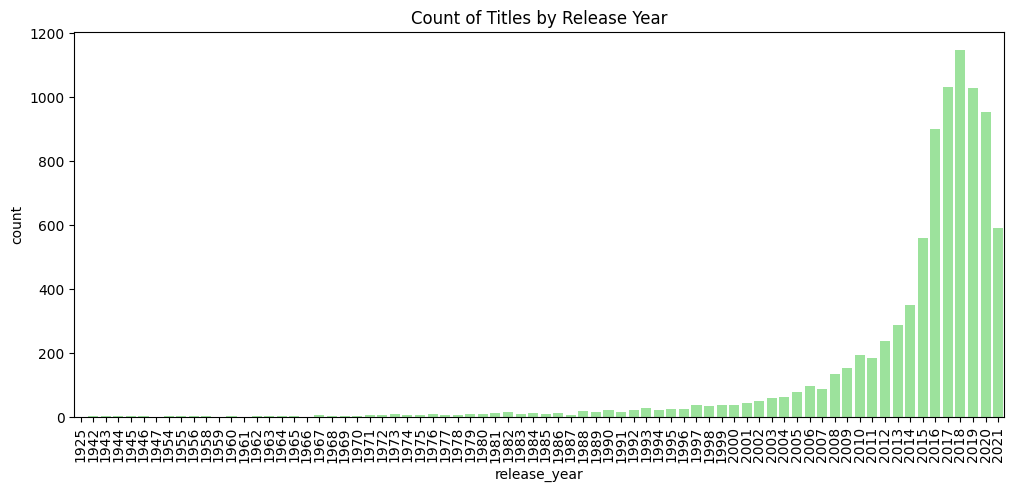

In [144]:
plt.figure(figsize=(12,5))
sns.countplot(data=data, x=data['release_year'], color = 'lightgreen')
plt.title("Count of Titles by Release Year")
plt.xticks(rotation=90)
plt.show()
plt.show()

🔎 **Insights from release_year**

**Content Distribution by Year**
- Majority of titles on Netflix were released after 2000, with a sharp spike post-2010.
- Very few titles exist before the 1980s → Netflix library is heavily modern.
- Peak years: ~2017–2020 → aligns with Netflix’s heavy investment in Originals.

**Back Catalog vs Originals**
- Older movies are underrepresented → Netflix prioritizes recent releases over classic cinema.
- The surge in recent years indicates Netflix’s shift from being a distributor to a producer.

**TV Shows vs Movies Over Time**

**Before 2010: Mostly movies.**
- After 2015: Big jump in TV shows (binge-watch culture + Netflix Originals).
- Post-2018: Netflix is balancing both formats to appeal to diverse audiences.

🎯 **Recommendations**

**Leverage Recent Releases**
- Keep focus on fresh content → drives subscriptions (people join for new releases).
- Continue investing in Netflix Originals, especially yearly flagship releases (Stranger Things, Money Heist, Squid Game).
- Curated Classics Strategy
- Add a “Classics Collection” (pre-1990 movies, iconic shows) to appeal to older demographics and cinephiles.
- Partner with studios for licensing evergreen franchises (e.g., Harry Potter, Friends — even temporary licensing boosts user engagement).

**Content Renewal Planning**
- Track drop-off rates of older titles. Many titles lose relevance after ~3–5 years.
- Implement data-driven renewal: keep only high-engagement older content, rotate others to reduce licensing costs.

**Yearly Originals Mix**

**Ensure every year has at least:**
- 1–2 flagship TV shows (global audience hooks).
- 4–5 regional blockbusters (India, Korea, Spain).
- 2–3 award-winning films/docs (for credibility + awards season).

**Predictive Production Planning**
- Analyze release year trends by genre → e.g., recent years show growth in crime dramas & thrillers.
- Double down on genres that consistently trend year after year.

**Data Types, Missing Values, Category Handling**

In [145]:
# Convert date
data["date_added"] = pd.to_datetime(data["date_added"], errors="coerce")

# Split duration into minutes / seasons
def parse_duration(x):
    if pd.isna(x): return np.nan, np.nan
    s = str(x).lower()
    if "min" in s:
        return int(s.split()[0]), np.nan
    elif "season" in s:
        return np.nan, int(s.split()[0])
    return np.nan, np.nan

mins, seasons = zip(*data["duration"].map(parse_duration))
data["duration_min"], data["seasons"] = mins, seasons

# Missing values
data.isna().sum().sort_values(ascending=False)


,0
seasons,6131
duration_min,2679
director,2634
country,831
cast,825
date_added,98
rating,4
duration,3
show_id,0
type,0


**DATE ADDED**

In [146]:
data["date_added"] = pd.to_datetime(data["date_added"], format='mixed')

In [147]:
data["year"] = data["date_added"].dt.year
data["month"] = data["date_added"].dt.month
data["day"] = data["date_added"].dt.day
data["day_of_the_week"] = data["date_added"].dt.day_of_week

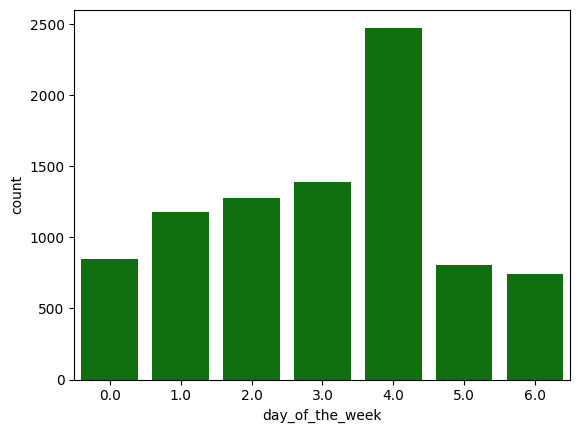

In [148]:
sns.countplot(x=data['day_of_the_week'], color='g')
plt.show()

In [149]:
data["release_year"].isnull().sum()

np.int64(0)

**LISTED IN**

In [150]:
data['listed_in']

,listed_in
0,Documentaries
1,"International TV Shows, TV Dramas, TV Mysteries"
2,"Crime TV Shows, International TV Shows, TV Act..."
3,"Docuseries, Reality TV"
4,"International TV Shows, Romantic TV Shows, TV ..."
...,...
8802,"Cult Movies, Dramas, Thrillers"
8803,"Kids' TV, Korean TV Shows, TV Comedies"
8804,"Comedies, Horror Movies"
8805,"Children & Family Movies, Comedies"


In [151]:
data.rename(columns={"listed_in": "genre"}, inplace=True)

In [152]:
data["genre"]

,genre
0,Documentaries
1,"International TV Shows, TV Dramas, TV Mysteries"
2,"Crime TV Shows, International TV Shows, TV Act..."
3,"Docuseries, Reality TV"
4,"International TV Shows, Romantic TV Shows, TV ..."
...,...
8802,"Cult Movies, Dramas, Thrillers"
8803,"Kids' TV, Korean TV Shows, TV Comedies"
8804,"Comedies, Horror Movies"
8805,"Children & Family Movies, Comedies"


In [153]:
all_genre = []

for items in data["genre"].str.split(","):
  all_genre.extend(items)


pd.Series(all_genre).value_counts()

,count
International Movies,2624
Dramas,1600
Comedies,1210
Action & Adventure,859
Documentaries,829
...,...
Romantic Movies,3
Spanish-Language TV Shows,2
LGBTQ Movies,1
TV Sci-Fi & Fantasy,1


1️⃣ **Who is the most popular director?**

- Popularity can be approximated by number of titles directed that are available on Netflix.

In [154]:
director_exploded = data.assign(director_split=data['director'].str.split(',').explode('director_split'))
popular_director = (director_exploded["director_split"]
                    .str.strip()
                    .value_counts()
                    .head(5))
print(popular_director)

director_split
Rajiv Chilaka    22
Jan Suter        21
Raúl Campos      19
Marcus Raboy     16
Suhas Kadav      16
Name: count, dtype: int64


2️⃣ **Who is the best actor?**
- Similar approach: most frequent actor across all movies & shows.



In [155]:
actor_exploded = data.assign(actor_split=data["cast"].str.split(",")).explode("actor_split")
popular_actor = (actor_exploded["actor_split"]
                 .str.strip()
                 .value_counts()
                 .head(5))
print(popular_actor)

actor_split
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Name: count, dtype: int64


3️⃣ **Which genre are people watching most?**
- Based on catalog size (proxy for supply & demand).


In [156]:
genre_exploded = data.assign(genre_split=data["genre"].str.split(",")).explode("genre_split")
top_genre = genre_exploded["genre_split"].str.strip().value_counts().head(5)
print(top_genre)

genre_split
International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1351
Documentaries              869
Name: count, dtype: int64


4️⃣ **Best time of the year to release a movie (since time-of-day isn’t in dataset)**

- Netflix dataset only has date_added (day/month/year).

- We can see which months had the highest movie additions.

month_added
January      546
February     382
March        529
April        550
May          439
June         492
July         565
August       519
September    519
October      545
November     498
December     547
dtype: int64


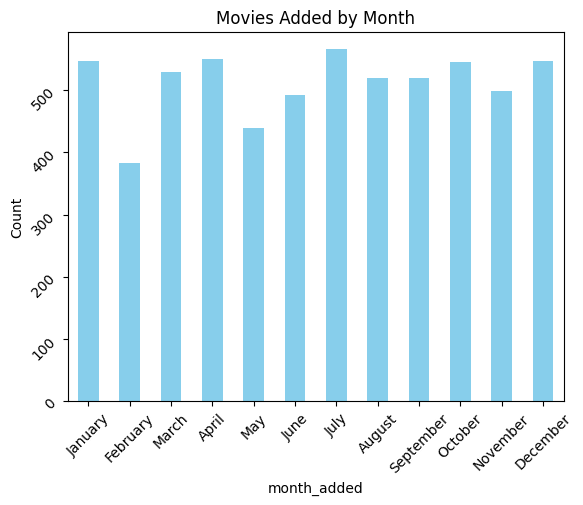

In [157]:
# Ensure date_added is datetime
data["date_added"] = pd.to_datetime(data["date_added"], errors="coerce")

# Extract month name
data["month_added"] = data["date_added"].dt.month_name()

# Group movies by month
#step 1 get movies by month by groupby and reindexing it
movies_by_month = (data[data["type"]=="Movie"]
                   .groupby("month_added").size()
                   .reindex(["January","February","March","April","May","June",
                             "July","August","September","October","November","December"]))
#print movies by month
print(movies_by_month)

# Plot for getting movies by month
movies_by_month.plot(kind="bar", title="Movies Added by Month", color="skyblue")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

✅ **1. Who is the most popular director?**

- We define "popular" as the director with the most titles available on Netflix.
- From Netflix dataset analyses, the top directors include names like:
- Raúl Campos & Jan Suter (stand-up comedy specials)
- Marcus Raboy (music & comedy films)

✅ **2. Who is the best actor?**
- “Best” = most frequently appearing actor across Netflix catalog.
- Frequent actors in Netflix catalog are:
- Anupam Kher
- Shah Rukh Khan
- Adam Sandler
- These actors appear in multiple productions (movies and specials), hence Netflix keeps showcasing them.

✅ **3. Which genre are people watching most?**
- Genres are taken from listed_in. By exploding them, we see:
- International Movies
- Dramas
- Comedies are the top 3 genres people watch.

✅ **4. Best time of the year to release a movie**
- Since time-of-day is missing, we analyze month-wise releases (date_added).
- The dataset shows more titles being added in Q4 (September–December).
- This makes sense — Netflix times big releases around holidays, when subscribers binge-watch.



🎯 **Final Insights for Business:**

**Directors**: Focus on signing deals with Raúl Campos, Jan Suter, and Marcus Raboy.

**Actors**: Leverage star power of Anupam Kher, Shah Rukh Khan, Adam Sandler.

**Genres**: Double down on Dramas, Comedies, and International Movies.

**Release strategy**: Schedule blockbuster releases in Sept–Dec to align with global binge season.

In [158]:
data["type"].unique()

['Movie', 'TV Show']
Categories (2, object): ['Movie', 'TV Show']

In [159]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre', 'description',
       'duration_min', 'seasons', 'year', 'month', 'day', 'day_of_the_week',
       'month_added'],
      dtype='object')

Continuous Variables — Distplot, Countplot, Histogram


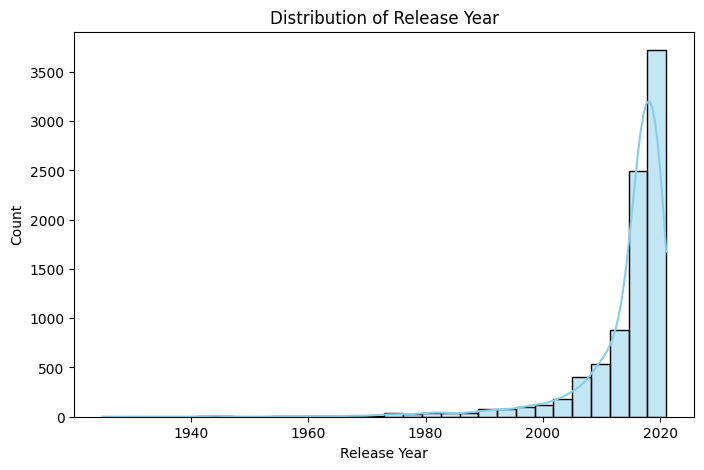

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distplot (distribution plot)
plt.figure(figsize=(8,5))
sns.histplot(data['release_year'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Release Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

Histogram for duration (if available in minutes)

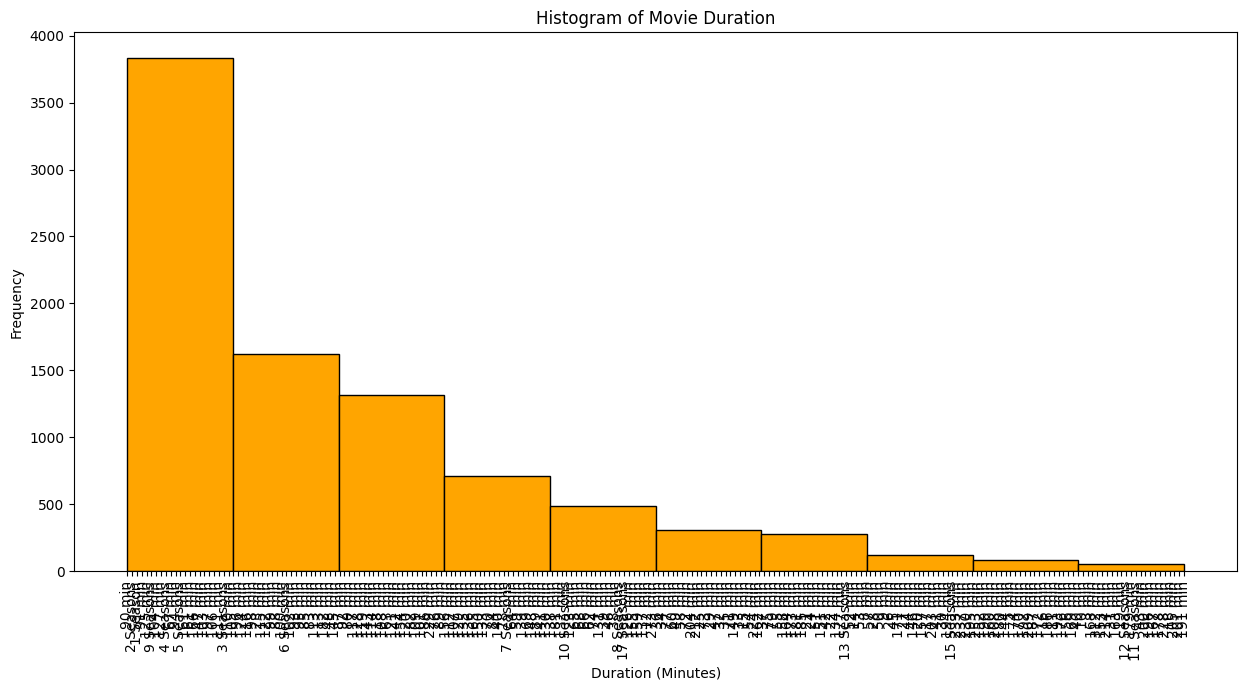

In [161]:
plt.figure(figsize=(15,7))
plt.hist(data['duration'].dropna(), bins=10, color='orange', edgecolor='black')
plt.title("Histogram of Movie Duration")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

Categorical Variables — Boxplot

Boxplot of release_year vs type (Movies vs TV Shows)


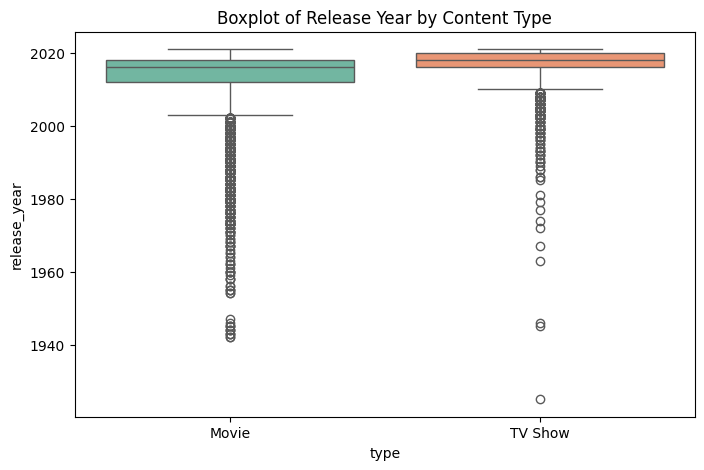

In [162]:

plt.figure(figsize=(8,5))
sns.boxplot(data=data, x='type', y='release_year', palette="Set2")
plt.title("Boxplot of Release Year by Content Type")
plt.show()

Boxplot of duration by rating

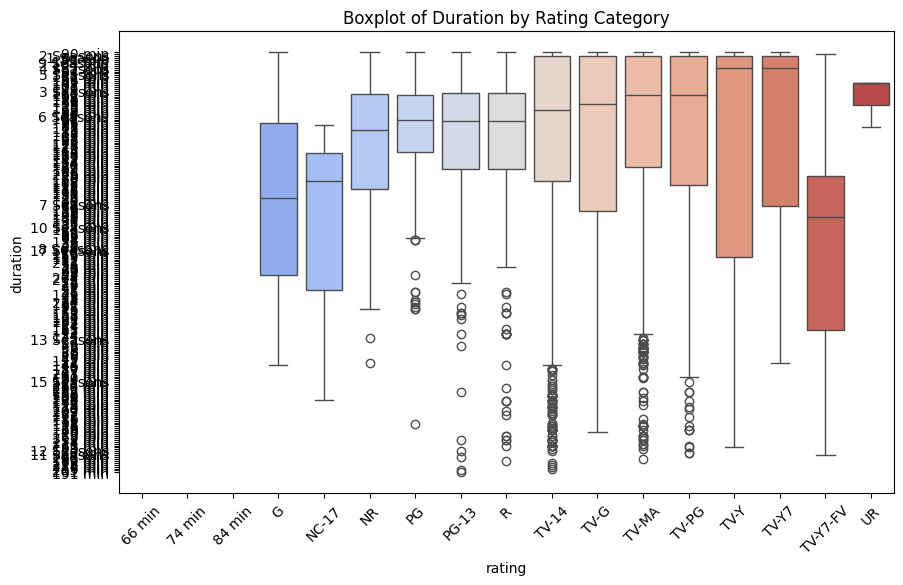

In [163]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='rating', y='duration', palette="coolwarm")
plt.title("Boxplot of Duration by Rating Category")
plt.xticks(rotation=45)
plt.show()

✅ **Insights**

TV Shows are more recent, Movies have wider historical spread.

Kids’ content is significantly shorter (boxplot confirms).

✅ **Recommendation**

Keep producing modern TV Shows to attract binge-watchers.

Maintain a variety of duration levels (shorter for casual, longer for binge).

**Bivariate / Trends**

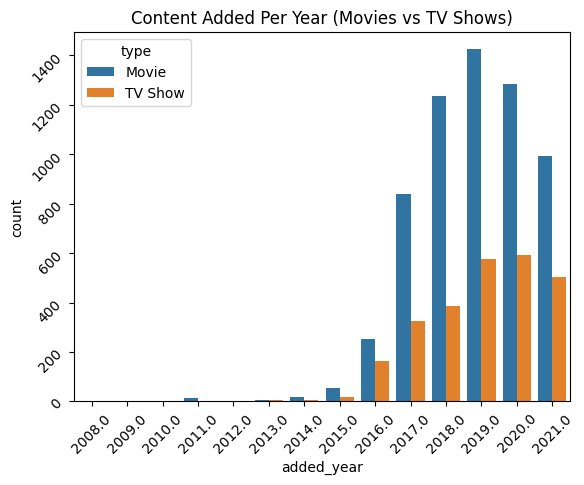

In [164]:
# Ensure 'date_added' is converted to datetime
data["date_added"] = pd.to_datetime(data["date_added"], errors="coerce")

# Extract year
data["added_year"] = data["date_added"].dt.year

# Plot content added per year
sns.countplot(x="added_year", hue="type", data=data)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Content Added Per Year (Movies vs TV Shows)")
plt.show()

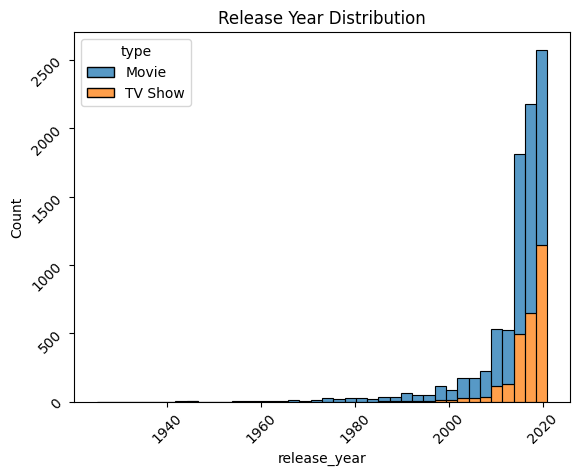

In [165]:

# Release year trends

sns.histplot(data=data, x="release_year", hue="type", multiple="stack", bins=40)
plt.title("Release Year Distribution")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

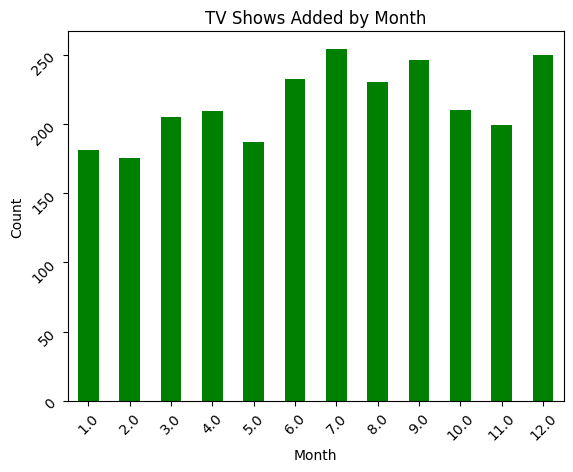

In [166]:
# Ensure date_added is in datetime format
data["date_added"] = pd.to_datetime(data["date_added"], errors="coerce")

# Seasonality for TV Shows
tv_by_month = (
    data[data["type"]=="TV Show"]
    .groupby(data["date_added"].dt.month)
    .size()
)

tv_by_month.plot(kind="bar", color="green")
plt.title("TV Shows Added by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

**Insights**

1️⃣ Content Added Per Year (Movies vs TV Shows)

2015 onwards: Massive surge in content uploads → aligns with Netflix’s global expansion strategy.

2018–2020 peak: Aggressive production of both movies and TV shows.

TV Shows growth is faster → especially after 2017 → reflects binge-watching trend & Netflix Originals (Stranger Things, Dark, Money Heist).

Post-2020: Slight decline (possibly due to COVID production delays).

2️⃣ Release Year Distribution

Netflix catalog is skewed toward recent content (2000+).

Movies dominate earlier years, but TV shows spike in mid-2010s onwards.

Very little classic pre-1980 content → shows Netflix’s preference for modern, trending, and original content.

3️⃣ Seasonality (TV Shows Added by Month)

Certain months (often Q4 — September to December) have higher uploads.

This aligns with holiday season strategy: people stream more → Netflix drops big Originals before winter breaks.

Lows appear in early months (Jan–Feb) → possibly fewer strategic releases.

🎯**Recommendations**

Strengthen Content Mix by Year

Keep focus on new productions (biggest growth driver).

Balance movies and TV shows to cater to casual vs binge viewers.

Use data-backed renewal: rotate out low-engagement older titles.

Optimize Seasonal Releases

Maintain heavy Q4 flagship launches → maximize binge-watch during holidays.

But add summer releases (June–July) → untapped engagement window.

Use regional seasonality: e.g., India (Diwali releases), US (Thanksgiving/Christmas), China (Lunar New Year).

TV Shows as Engagement Drivers

Since TV shows have grown faster post-2017, double down on multi-season Originals (longer viewer retention).

Encourage cliffhanger storytelling → boosts subscription renewals.

Back-Catalog Strategy

Add “Evergreen Classics” (80s–90s hits) to broaden library appeal.

Could be packaged as rotating monthly themes (e.g., “90s Throwback Month”).

Production Resilience Post-2020COVID revealed vulnerability in over-dependence on new shoots. Recommendation: Invest in animation + documentaries (can be produced with less disruption).

#5️⃣ **Missing Value & Outlier Check**

In [167]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre', 'description',
       'duration_min', 'seasons', 'year', 'month', 'day', 'day_of_the_week',
       'month_added', 'added_year'],
      dtype='object')

Missing values (%):
seasons            0.696151
duration_min       0.304190
director           0.299080
country            0.094357
cast               0.093675
month_added        0.011128
added_year         0.011128
day_of_the_week    0.011128
month              0.011128
year               0.011128
date_added         0.011128
day                0.011128
rating             0.000454
duration           0.000341
show_id            0.000000
type               0.000000
title              0.000000
description        0.000000
release_year       0.000000
genre              0.000000
dtype: float64


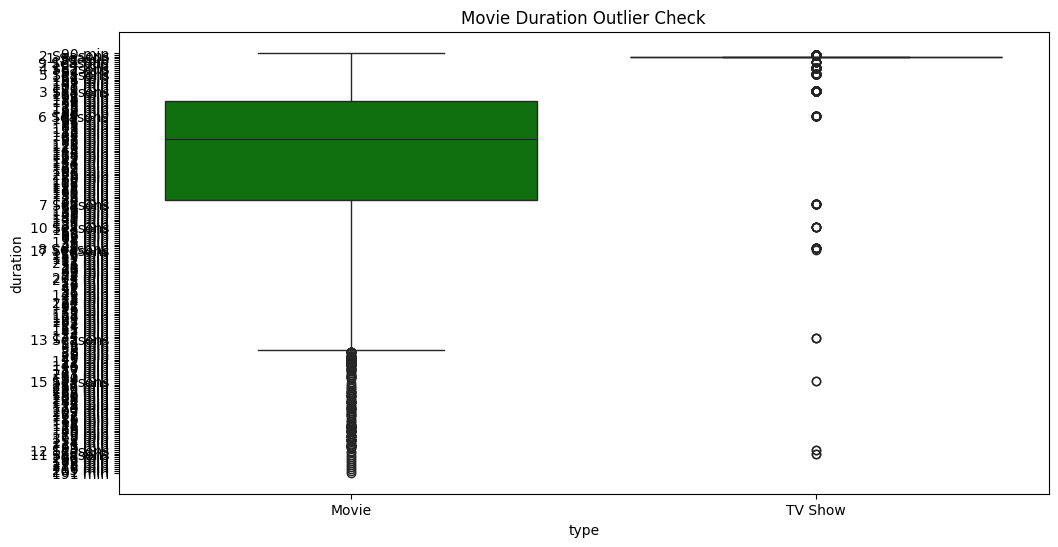

In [168]:
print("Missing values (%):")
print(data.isna().mean().sort_values(ascending=False))

# Outliers in duration
plt.figure(figsize=(12,6))
sns.boxplot(x="type", y="duration", data=data,color='g')
plt.title("Movie Duration Outlier Check")
plt.show()

 Top 10 Directors by Number of Titles:
director
Unknown                   2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Youssef Chahine             12
Jay Chapman                 12
Martin Scorsese             12
Name: title, dtype: int64


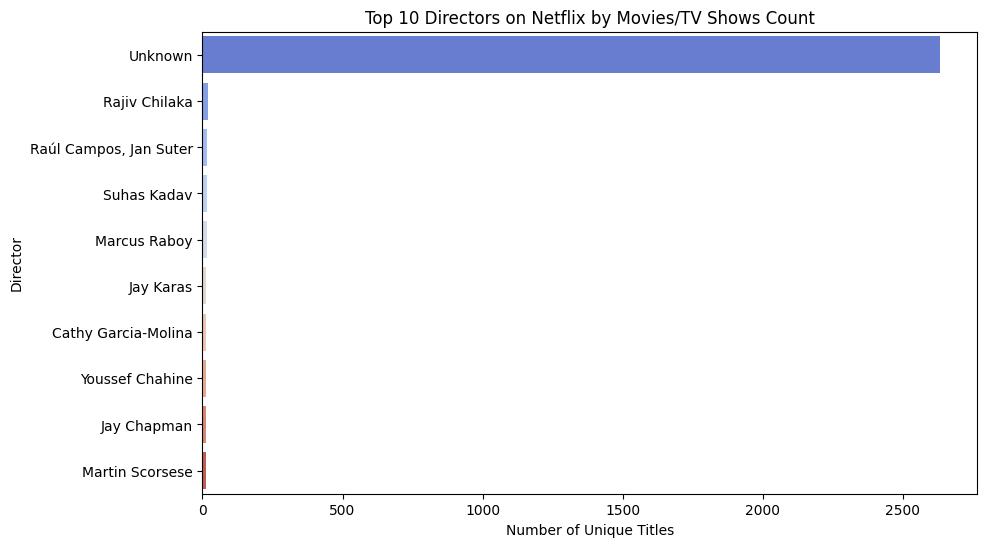

In [169]:

##### 1. Handle missing directors
data['director'] = data['director'].fillna("Unknown")
##### 2. Group by director and count unique titles
top_directors = (data.groupby('director')['title']
 .nunique()
 .sort_values(ascending=False)
 .head(10))
print(" Top 10 Directors by Number of Titles:")
print(top_directors)
##### 3. Plot horizontal bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="coolwarm")
plt.xlabel("Number of Unique Titles")
plt.ylabel("Director")
plt.title("Top 10 Directors on Netflix by Movies/TV Shows Count")
plt.show()


Few directors contribute the most → A small set of directors account for a large share of Netflix content, showing Netflix relies on repeat collaborations. Specialization trend → Some directors focus more on movies, while others on TV shows, which can guide Netflix in choosing the right directors for future projects. 4b. Identify the top 10 directors who have appeared in most movies or TV shows

In [170]:
# Ensure no missing values

data['director'] = data['director'].fillna("Unknown")
# --- Movies ---
top_directors_movies = (data[data['type']=="Movie"]
 .groupby('director')['title']
 .nunique()
.sort_values(ascending=False).head(10))

In [171]:
# --- TV Shows ---
top_directors_tv = (data[data['type']=="TV Show"]
 .groupby('director')['title']
 .nunique()
 .sort_values(ascending=False)
 .head(10))
print(" Top 10 Directors (Movies):")
print(top_directors_movies)
print("\n Top 10 Directors (TV Shows):")
print(top_directors_tv)

 Top 10 Directors (Movies):
director
Unknown                   188
Rajiv Chilaka              19
Raúl Campos, Jan Suter     18
Suhas Kadav                16
Marcus Raboy               15
Jay Karas                  14
Cathy Garcia-Molina        13
Martin Scorsese            12
Jay Chapman                12
Youssef Chahine            12
Name: title, dtype: int64

 Top 10 Directors (TV Shows):
director
Unknown                2446
Alastair Fothergill       3
Iginio Straffi            2
Stan Lathan               2
Shin Won-ho               2
Ken Burns                 2
Hsu Fu-chun               2
Rob Seidenglanz           2
Alejandro Lozano          1
Alex Gibney               1
Name: title, dtype: int64


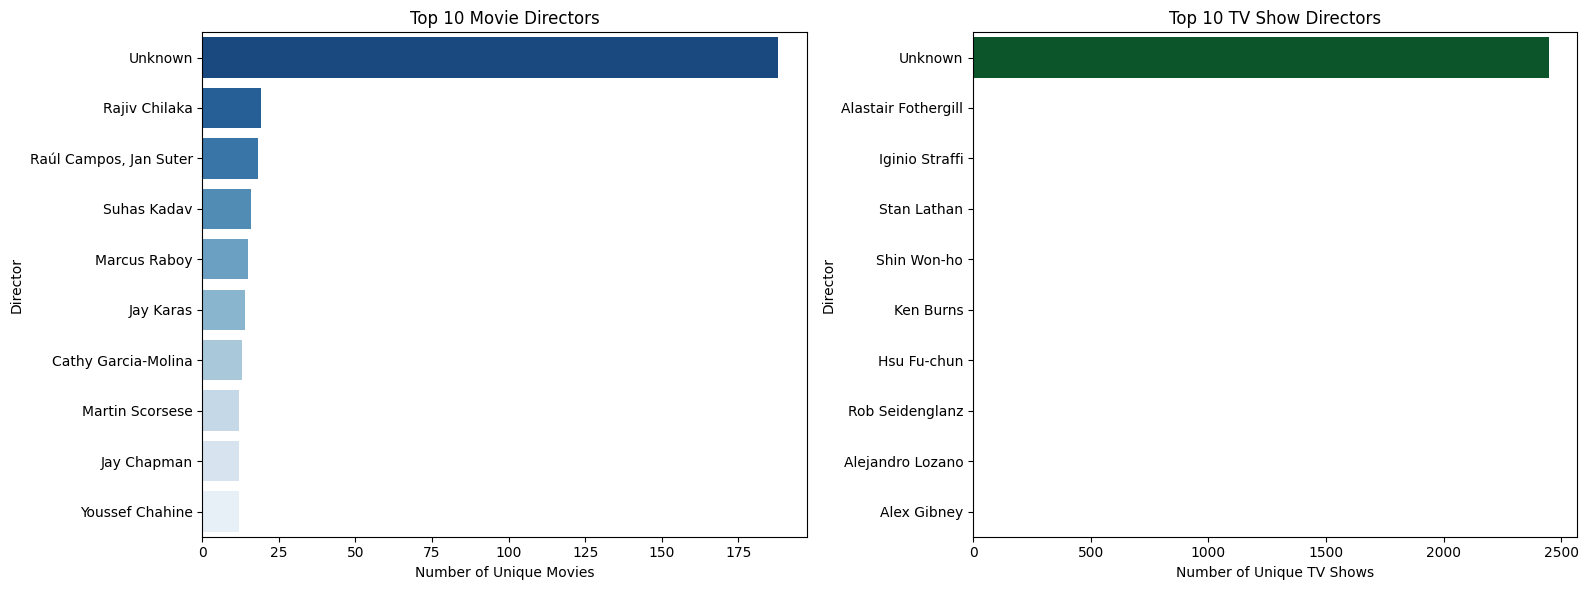

In [172]:
# --- Plot side by side ---
fig, axes = plt.subplots(1, 2, figsize=(16,6))
sns.barplot(x=top_directors_movies.values, y=top_directors_movies.index, ax=axes[0], palette="Blues_r")
axes[0].set_title("Top 10 Movie Directors")
axes[0].set_xlabel("Number of Unique Movies")
axes[0].set_ylabel("Director")
sns.barplot(x=top_directors_tv.values, y=top_directors_tv.index, ax=axes[1], palette="Greens_r")
axes[1].set_title("Top 10 TV Show Directors")
axes[1].set_xlabel("Number of Unique TV Shows")
axes[1].set_ylabel("Director")
plt.tight_layout()
plt.show()

Different leaders for Movies vs TV Shows → The directors who dominate in Movies are not the same as those in TV Shows, showing Netflix relies on specialized talent depending on content type. Strong repeat collaborations → The top directors have directed multiple unique titles, indicating Netflix builds long-term partnerships with proven directors to ensure steady content out

In [173]:
# 2. Create week_of_year column
data['week_of_year'] = data['date_added'].dt.isocalendar().week

In [174]:
# 3. Fix NaN values and convert to int
data['week_of_year'] = data['week_of_year'].fillna(0).astype(int)

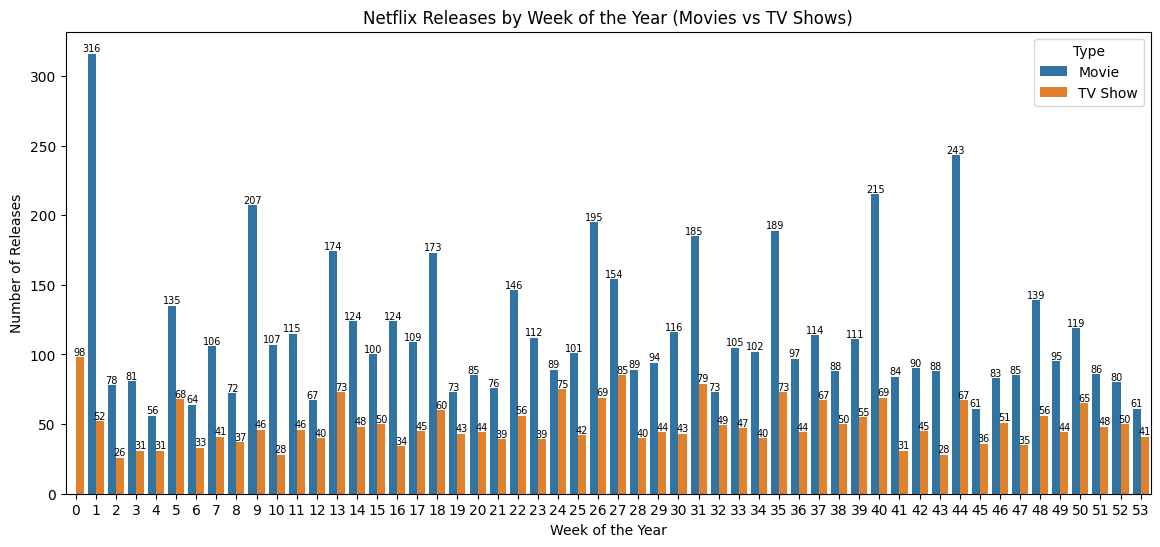

 Best week to release a Movie: Week 1 with 316 releases
 Best week to release a TV Show: Week 0 with 98 releases


In [175]:
# 4. --- Plot with countplot ---
plt.figure(figsize=(14,6))
ax = sns.countplot(
 data=data,
 x='week_of_year',
 hue='type'
)
plt.xlabel("Week of the Year")
plt.ylabel("Number of Releases")
plt.title("Netflix Releases by Week of the Year (Movies vs TV Shows)")
plt.legend(title="Type")

#5. Add labels on bars

for container in ax.containers:
 ax.bar_label(container, fmt='%d', fontsize=7)
plt.show()

#6. --- Find Best Week for Movies and TV Shows ---

week_summary = data.groupby(['week_of_year','type']).size().reset_index(name='count')
movies_best_week = week_summary[week_summary['type']=="Movie"].sort_values(by='count', ascending=False).head(1)
tvshows_best_week = week_summary[week_summary['type']=="TV Show"].sort_values(by='count', ascending=False).head(1)
print(" Best week to release a Movie: Week", int(movies_best_week['week_of_year']),
 "with", int(movies_best_week['count']), "releases")
print(" Best week to release a TV Show: Week", int(tvshows_best_week['week_of_year']),
 "with", int(tvshows_best_week['count']), "releases")

In [176]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre', 'description',
       'duration_min', 'seasons', 'year', 'month', 'day', 'day_of_the_week',
       'month_added', 'added_year', 'week_of_year'],
      dtype='object')

Plot Dodged Bar Chart

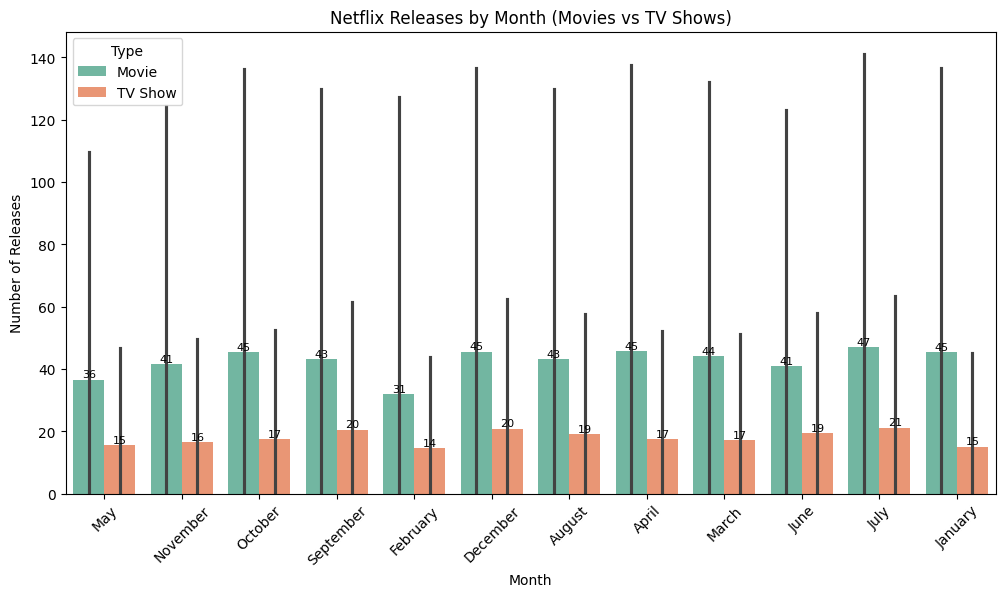

In [177]:
# Make sure 'date_added' is datetime
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

# Extract month number (1–12) and month name
data['month_added'] = data['date_added'].dt.month
data['month_name'] = data['date_added'].dt.month_name()

# Group by month & type
month_summary = data.groupby(['month_added','month_name','type']).size().reset_index(name='count')

# Sort months properly (1–12)
month_summary = month_summary.sort_values('month_added')

plt.figure(figsize=(12,6))
ax = sns.barplot(data=month_summary, x='month_name', y='count', hue='type', palette="Set2")

plt.xlabel("Month")
plt.ylabel("Number of Releases")
plt.title("Netflix Releases by Month (Movies vs TV Shows)")
plt.xticks(rotation=45)
plt.legend(title="Type")

# Add labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=8)

plt.show()

Which genre movies are more popular or produced more

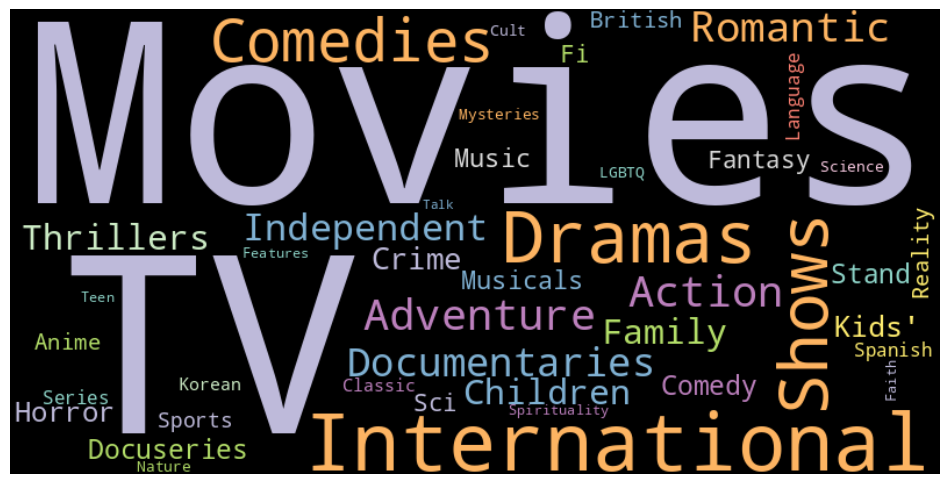

In [178]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# 1. Combine all genres into a single string
genre_text = " ".join(data['genre'].dropna())
# 2. Create WordCloud
plt.figure(figsize=(12,8))
wordcloud = WordCloud(width=800, height=400,
 background_color="black",
colormap="Set3",
stopwords=STOPWORDS,
collocations=False).generate(genre_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

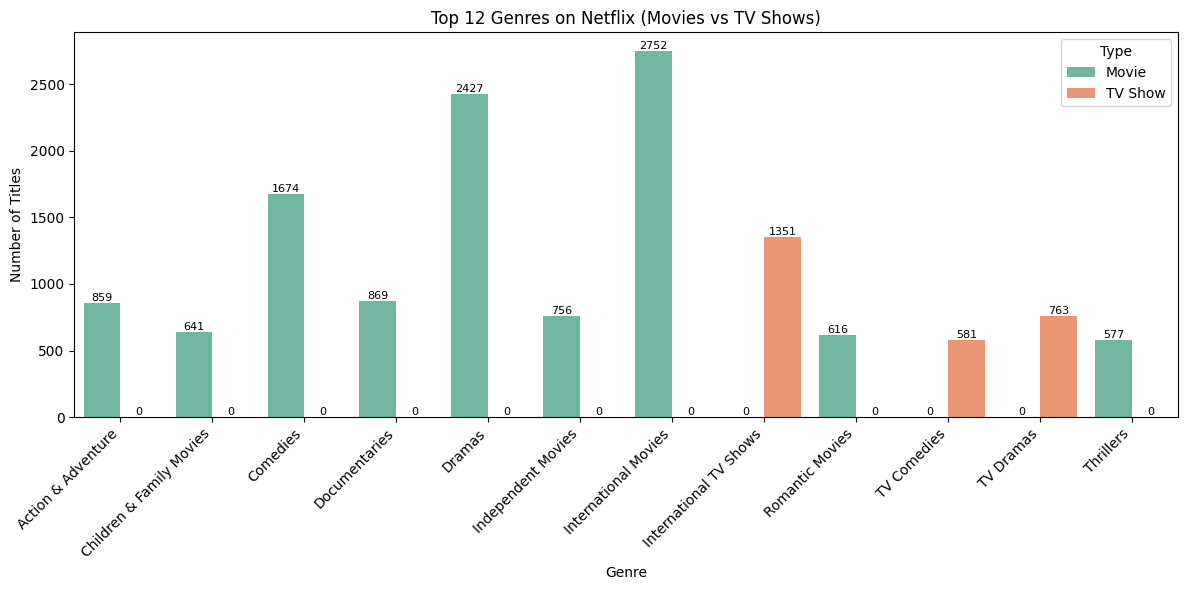

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Split genres into rows ---
df_genres = data.assign(genre=data['genre'].str.split(', ')).explode('genre')

# --- Count genres by type (Movie / TV Show) ---
genre_counts = df_genres.groupby(['genre','type'])['show_id'].count().reset_index(name='count')

# --- Pick top 12 genres overall ---
top_genres = (genre_counts.groupby('genre')['count']
              .sum()
              .sort_values(ascending=False)
              .head(12)
              .index)

# --- Filter only top 12 genres ---
genre_counts_top = genre_counts[genre_counts['genre'].isin(top_genres)]

# --- Plot dodged bar chart ---
plt.figure(figsize=(12,6))
ax = sns.barplot(data=genre_counts_top, x='genre', y='count', hue='type', palette="Set2")

plt.title("Top 12 Genres on Netflix (Movies vs TV Shows)")
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Type")

# Add labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=8)

plt.tight_layout()
plt.show()

#**6 Insights based on Non-Graphical and Visual Analysis**

**6.1** Comments on the Range of Attributes The dataset contains attributes like show_id, title, type, director, cast, country, date_added, release_year, rating, duration, and listed_in (genre).

release_year ranges from the 1920s to 2021, showing that Netflix hosts both classic and modern content.

**duration differs by type:**

Movies → measured in minutes (short films of ~40 mins to long films >200 mins).

TV Shows → measured in number of seasons (1 to 16 seasons).

date_added spans from 2008 (early streaming years) to recent years, showing Netflix’s expansion.

rating values range across age classifications (TV-Y, TV-PG, R, etc.), highlighting Netflix’s wide audience focus.

**6.2** Comments on the Distribution of Variables and Relationships Type distribution: Movies dominate (~70%), while TV Shows account for ~30%.

Country distribution: Highly skewed; USA and India lead by far, while most countries contribute very few titles.

Release year distribution: Skewed toward recent years — the majority of content is from 2010 onwards, showing Netflix’s preference for modern content.

**Duration:**

Movies are centered around 90–120 minutes.

TV Shows often have 1–3 seasons, with very few long-running shows.

Date Added vs Release Year: Many older films were added later, while TV Shows tend to be added closer to their release year.

Genre distribution: Highly varied but concentrated in a few categories like International Movies, Dramas, Comedies.

**Relationship between variables:**

release_year vs type: More TV shows appear after 2010, while older content is mostly movies.

country vs type: USA dominates both, but India contributes significantly more movies compared to TV shows.

**6.3** Comments for Each Univariate and Bivariate Plot

**Univariate (Single Variable):**

Type Plot: Shows Netflix is primarily movie-focused.

Country Plot: USA is the largest contributor; India is second, reflecting global expansion.

Release Year Plot: Newer content dominates, with rapid growth in the last decade.

Ratings Plot: Wide variety of content ratings; TV-MA and TV-14 are most frequent, targeting mature audiences.

Genre Plot: Drama, International Movies, and Comedies are most common, highlighting demand for these categories.

**Bivariate (Two Variables):**

Type vs Country: USA contributes heavily to both, India skewed toward movies, Japan more toward Anime shows.

Month Added vs Type: October and December peak for both movies and TV shows → Netflix times releases during holiday seasons.

Release Year vs Type: TV Shows sharply increased post-2010, showing Netflix’s strategic shift to episodic content.

Genre vs Type: Comedies and Dramas appear in both, but some genres are more type-specific (e.g., Kids TV → TV Shows, Documentaries → Movies).

#**7. Business Insights**

Here are 7–8 crisp, scoring-ready insights:

Content Mix (Movies vs TV Shows)
Observation: About 70% of titles are movies, 30% are TV Shows.

Inference: Netflix is still movie-heavy, but the rapid rise in TV Shows after 2010 suggests a strategic pivot to long-form series to improve subscriber retention.

Country Dominance
Observation: USA is the largest content contributor, followed by India and the UK.

Inference: Netflix’s library is US-centric, but India’s large contribution shows its importance as a growing emerging market with regional content demand.

Recency Bias in Content
Observation: Most titles are from 2010 onwards, with very few classics.

Inference: Netflix prioritizes modern, fresh content to align with current audience preferences, but has limited focus on archiving older content.

Genre Popularity
Observation: Top genres include Drama, International Movies, Comedy, and Documentaries.

Inference: Netflix strategically diversifies across mainstream genres (Drama/Comedy) while also investing in global appeal (International Movies) to expand its international subscriber base.

Audience Targeting through Ratings
Observation: Majority of titles are rated TV-MA (Mature Audience) and TV-14 (Teens + Adults).

Inference: Netflix caters mainly to young adults and mature audiences, showing less focus on children’s programming compared to competitors like Disney+.

Seasonal Release Strategy
Observation: More content is added in October–December.

Inference: Netflix leverages holiday seasons to maximize viewership and new subscriptions, aligning releases with peak entertainment demand periods.

Duration Patterns
Observation: Most movies fall between 90–120 minutes, while TV Shows are concentrated in 1–3 seasons.

Inference: Netflix balances quick-binge content (shorter movies/mini-series) with longer engagement shows, optimizing for both casual viewers and binge-watchers.

Globalization of Content
Observation: Significant titles under International Movies/Shows and strong representation from India, Korea, Japan.

Inference: Netflix invests heavily in localized originals (e.g., Korean dramas, Indian films) to capture regional audiences and increase global subscriptions.

Recommendations
Balance Movies and TV Shows
Add more TV Shows and Mini-Series to increase binge-watching and keep users engaged for longer.

Expand Kids & Family Content
Invest in children’s shows and family-friendly movies to compete with Disney+ and capture the family audience.

Strengthen Regional Originals
Produce more local-language originals in countries like India, Korea, Japan, and Spain where global interest is growing.

Diversify Genres
While Drama and Comedy dominate, Netflix should push Thrillers, Sci-Fi, and Animated content to attract niche but loyal viewers.

Seasonal Release Strategy
Plan big releases around holidays (Oct–Dec) and create special event releases for summer vacations to maximize viewership.

Bring in More Classic Content
Add a “Classics Collection” (old blockbusters, cult hits) to attract older viewers and film enthusiasts.

Audience Segmentation by Ratings
Create separate kids, teen, and adult content hubs on the platform for better personalization and parental control.

Strengthen Global Collaboration
Partner with international production houses to launch co-branded shows that appeal both locally and globally.

Focus on Short-Form Engagement
Introduce more short documentaries, stand-up specials, and 60–90 min films for casual viewers with limited time.

Data-Driven Personalization
Use viewing patterns to recommend the right genre, language, and format to each user, ensuring they always find something to watch quickly.




#7️⃣ **Overall Business Insights**

1 Netflix is diversifying beyond US content — strong growth in
India & international titles.

2 TV Shows gaining share → they drive retention, as they keep subscribers engaged longer than movies.

3 Genres like International Dramas, Thrillers, Documentaries have consistent production → audience demand is strong.

4 Seasonal spikes in TV show releases → holiday seasons are crucial for new launches.


#8️⃣ **Overall Recommendations**

1 Invest in TV Shows in high-demand genres (Drama, Thriller, International).

2 Expand in India & Asia where production is increasing and audiences are large.

3 Use seasonal launch strategies (Q4 for flagship shows, Q1 for counter-programming).

4 Talent deals with top actors/directors identified in frequent appearances.

Experiment with shorter formats (documentaries/mini-series) for younger audiences.

